In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import pickle

from glob import iglob

In [3]:
import importlib
import src.pipeline as pipeline

In [112]:
importlib.reload(pipeline)

<module 'src.pipeline' from '/Users/vinsonmccready/galvanize/loan-default-predictor/src/pipeline.py'>

In [4]:
data = pipeline.get_all_data('data/raw/')

In [5]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,year
0,145217616,NaN,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
1,145640422,NaN,2500,2500,2500.0,36 months,13.56%,84.92,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
2,145630143,NaN,12000,12000,12000.0,60 months,13.56%,276.49,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
3,145127870,NaN,15000,15000,14975.0,60 months,14.47%,352.69,C,C2,...,Oct-99,0.0,0.0,16.0,48.8,15.0,0.0,0.0,NaN,18
4,145558466,NaN,16000,16000,16000.0,60 months,17.97%,406.04,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18


In [6]:
data['loan_status'].value_counts()

Current               2086919
Fully Paid             552459
Charged Off            131231
Late (31-120 days)      32304
In Grace Period         22089
Issued                  21294
Late (16-30 days)        8147
Default                    29
Name: loan_status, dtype: int64

In [7]:
data['application_type'].value_counts()

INDIVIDUAL    1359464
Individual    1284175
Joint App      194206
JOINT           13707
DIRECT_PAY       2920
Name: application_type, dtype: int64

In [8]:
# Only use individual loan types
data = pipeline.filter_data(data)
data['application_type'].unique()

array(['Individual', 'INDIVIDUAL'], dtype=object)

In [9]:
data.shape[0]

2643639

In [11]:
# Columns with missing data

data[data.columns[data.isnull().sum()/data.shape[0] > .2]].isnull().sum()/data.shape[0]

member_id                              1.000000
desc                                   0.963374
mths_since_last_delinq                 0.519161
mths_since_last_record                 0.850447
next_pymnt_d                           0.254702
mths_since_last_major_derog            0.744397
annual_inc_joint                       1.000000
dti_joint                              1.000000
verification_status_joint              1.000000
open_acc_6m                            0.311407
open_il_12m                            0.311406
open_il_24m                            0.311406
mths_since_rcnt_il                     0.331586
total_bal_il                           0.311406
il_util                                0.407763
open_rv_12m                            0.311406
open_rv_24m                            0.311406
max_bal_bc                             0.311406
all_util                               0.311497
inq_fi                                 0.311406
total_cu_tl                            0

In [12]:
drop = ['member_id', 
        'desc', 'next_pymnt_d', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 
        'revol_bal_joint', 'sec_app_fico_range_low', 
        'sec_app_fico_range_high',
        'sec_app_earliest_cr_line', 
        'sec_app_inq_last_6mths',
        'sec_app_mort_acc', 
        'sec_app_open_acc',
        'sec_app_revol_util',
#         'sec_app_open_il_6m', 
        'sec_app_num_rev_accts',
        'sec_app_chargeoff_within_12_mths',
        'sec_app_collections_12_mths_ex_med',
        'sec_app_mths_since_last_major_derog',
        'funded_amnt_inv', 
        'grade',
        'emp_title', 
        'emp_length',
        'pymnt_plan',
        'url',
        'title',
        'zip_code',
        'addr_state',
        'earliest_cr_line',
        'fico_range_high',
        'initial_list_status',
        'out_prncp',
        'out_prncp_inv',
        'total_pymnt',
        'total_pymnt_inv',
        'total_rec_prncp',
        'total_rec_int',
        'total_rec_late_fee',
        'recoveries',
        'collection_recovery_fee',
        'last_credit_pull_d', 
        'last_pymnt_d',
        'last_pymnt_amnt',
        'next_pymnt_d',
        'acc_now_delinq',
        'tot_coll_amt',
        'tot_cur_bal',
        'delinq_amnt', 
        'application_type', 
        'issue_d', 
        'id',
        'loan_status',
        'year'
       ]
# data = data.drop(drop, axis=1)

In [13]:
data.purpose.unique()

array(['debt_consolidation', 'credit_card', 'home_improvement', 'other',
       'major_purchase', 'vacation', 'house', 'car', 'small_business',
       'renewable_energy', 'medical', 'moving', 'wedding', 'educational'],
      dtype=object)

In [113]:
# Missing values
pipeline.print_missing(data)

'member_id': number of missing values '2643639' ==> '100.000%'
'emp_title': number of missing values '221805' ==> '8.390%'
'emp_length': number of missing values '172991' ==> '6.544%'
'desc': number of missing values '2546814' ==> '96.337%'
'title': number of missing values '22178' ==> '0.839%'
'zip_code': number of missing values '1' ==> '0.000%'
'inq_last_6mths': number of missing values '1' ==> '0.000%'
'mths_since_last_delinq': number of missing values '1372475' ==> '51.916%'
'mths_since_last_record': number of missing values '2248274' ==> '85.045%'
'revol_util': number of missing values '2053' ==> '0.078%'
'last_pymnt_d': number of missing values '20363' ==> '0.770%'
'next_pymnt_d': number of missing values '673340' ==> '25.470%'
'last_credit_pull_d': number of missing values '77' ==> '0.003%'
'mths_since_last_major_derog': number of missing values '1967916' ==> '74.440%'
'annual_inc_joint': number of missing values '2643639' ==> '100.000%'
'dti_joint': number of missing values '2

<AxesSubplot:>

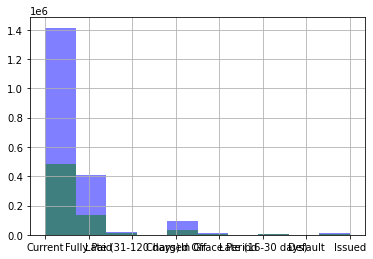

In [15]:
fig, ax = plt.subplots()

data[data['mths_since_last_major_derog'].isna()]['loan_status'].hist(ax = ax, alpha=.5, color='blue')
data[~data['mths_since_last_major_derog'].isna()]['loan_status'].hist(ax = ax, alpha=.5, color='green')

<AxesSubplot:>

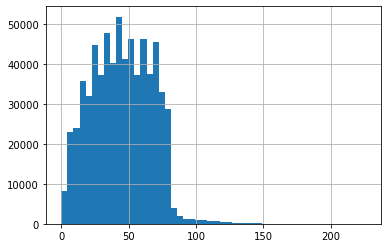

In [16]:
data['mths_since_last_major_derog'].hist(bins = 50)

In [17]:
# Clean data

data = pipeline.clean_data(data)

In [18]:
# Create Test and Validation Set

data['year'].unique()

array([18, 13, 12, 14, 15, 20, 19, 17, 16])

<BarContainer object of 9 artists>

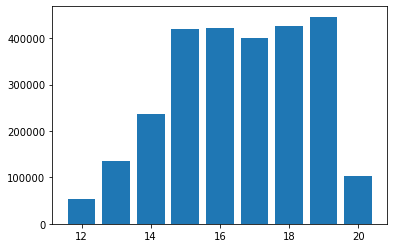

In [19]:
fig, ax = plt.subplots()

ax.bar(data['year'].value_counts().index,data['year'].value_counts() )

In [23]:
(data['year'] >= 17).sum()/data.shape[0]

0.5206917434642173

In [18]:
(data[data['year'] >= 17]['loan_status']=='Charged Off').sum()/data[data['year'] >= 17].shape[0]

0.08287779507415319

In [20]:
(data[data['year'] < 17]['loan_status']=='Charged Off').sum()/data[data['year'] < 17].shape[0]

0.2085436880049994

In [21]:
data[data['loan_status']=='Charged Off'].groupby('year')['year'].count()/data.groupby('year')['year'].count()

year
12    0.164491
13    0.160649
14    0.205134
15    0.264148
16    0.202681
17    0.118006
18    0.051843
19    0.044889
20    0.008303
Name: year, dtype: float64

In [20]:
data = pipeline.create_dummies(data)

In [21]:
validation = data[data['year'] >= 17]

In [22]:
# drop.extend([
#     'application_type', 
#     'issue_d', 
#     'id',
#     'loan_status',
#     'year'])

In [108]:
with open('data/X_drop.pickle', 'wb') as f:
    pickle.dump(drop, f)

In [110]:
with open('data/X_drop.pickle', 'rb') as f:
    cols = pickle.load(f)

In [111]:
cols

['member_id',
 'desc',
 'next_pymnt_d',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'funded_amnt_inv',
 'grade',
 'emp_title',
 'emp_length',
 'pymnt_plan',
 'url',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'fico_range_high',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_credit_pull_d',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'delinq_amnt',
 'application_type',
 'issue_d',
 'id',
 'loan_status',

In [23]:
training = pipeline.completed_filter(data[data['year'] < 17])

In [24]:

X_train = pipeline.create_X(training, drop)
y_train = pipeline.create_y(training)

In [25]:
X_test = pipeline.create_X(pipeline.completed_filter(validation), drop)
y_test = pipeline.create_y(pipeline.completed_filter(validation))

In [26]:
validation[~validation['loan_status'].str.lower().isin(['fully paid', 'charged off'])]['loan_status'].unique()

array(['Current', 'Late (31-120 days)', 'In Grace Period',
       'Late (16-30 days)', 'Issued', 'Default'], dtype=object)

In [27]:
X_val = pipeline.create_X(validation[~validation['loan_status'].str.lower().isin(['fully paid', 'charged off'])], drop)
y_val = pipeline.create_y(validation[~validation['loan_status'].str.lower().isin(['fully paid', 'charged off'])])

In [28]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(590471, 126)
(82869, 126)
(1293652, 126)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import recall_score, precision_score

In [30]:
# X_train, X_test, y_train, y_test = train_test_split(X,y)

In [31]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
recall = recall_score(y_test, rf_model.predict(X_test))
precision = precision_score(y_test, rf_model.predict(X_test))
print(f'Recall: {recall}\nPrecision: {precision}')

Recall: 0.8163948747815958
Precision: 0.89368823716927


In [32]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
recall = recall_score(y_test, gb_model.predict(X_test))
precision = precision_score(y_test, gb_model.predict(X_test))
print(f'Recall: {recall}\nPrecision: {precision}')

Recall: 0.8118811881188119
Precision: 0.8925884424523771


In [33]:
def calculate_threshold_values(prob, y):
    '''
    Build dataframe of the various confusion-matrix ratios by threshold
    from a list of predicted probabilities and actual y values
    '''
    df = pd.DataFrame({'prob': prob, 'y': y})
    df.sort_values('prob', inplace=True)
    
    actual_p = df.y.sum()
    actual_n = df.shape[0] - df.y.sum()

    df['tn'] = (df.y == 0).cumsum()
    df['fn'] = df.y.cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df = df.reset_index(drop=True)
    return df
    
def plot_roc(ax, df):
    ax.plot([1]+list(df.fpr), [1]+list(df.tpr), label="ROC")
    ax.plot([0,1],[0,1], 'k', label="random")
    ax.set_xlabel('fpr')
    ax.set_ylabel('tpr')
    ax.set_title('ROC Curve')
    ax.legend()
    
def plot_precision_recall(ax, df):
    ax.plot(df.tpr,df.precision, label='precision/recall')
    #ax.plot([0,1],[0,1], 'k')
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_title('Precision/Recall Curve')
    ax.plot([0,1],[df.precision[0],df.precision[0]], 'k', label='random')
    ax.set_xlim(left=0,right=1)
    ax.set_ylim(bottom=0,top=1)

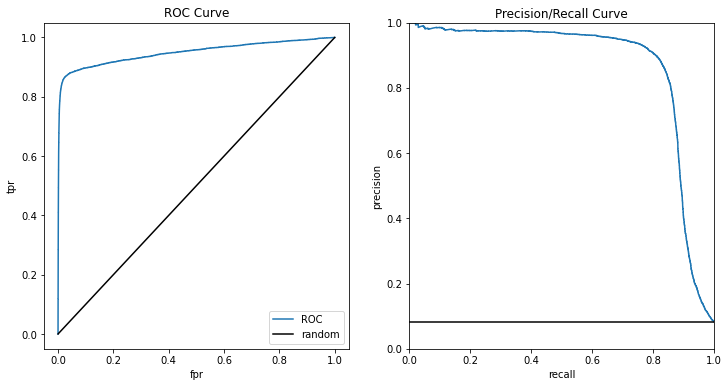

In [34]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
df = calculate_threshold_values(rf_model.predict_proba(X_test)[:,1], y_test)
plot_roc(ax0, df)
plot_precision_recall(ax1, df)

In [35]:
probabilities = rf_model.predict_proba(X_test)

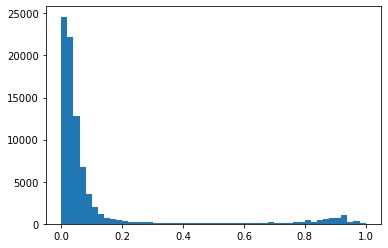

In [36]:
fig, ax = plt.subplots()
ax.hist(probabilities[:,1], bins=50);

In [37]:
(probabilities > .5).sum()

82827

In [38]:
y_test.sum()

6868

In [39]:
threshold = np.linspace(0,1,50)
yhat = rf_model.predict_proba(X_test)[:,1]

recall = []
precision = []
for t in threshold:
    c = pd.crosstab(pd.Categorical(y_test, categories=[0,1]), 
                    pd.Categorical(yhat>t, categories=[0,1]), 
                    rownames=['actual'], 
                    colnames=['predicted'],
                    dropna=False)
    r = c[1][1]/(c[1][1]+c[0][1])
    p = c[1][1]/(c[1][1]+c[1][0])
    recall.append(r)
    precision.append(p)

<ipython-input-39-6ed33272057a>:13: RuntimeWarning: invalid value encountered in long_scalars
  p = c[1][1]/(c[1][1]+c[1][0])


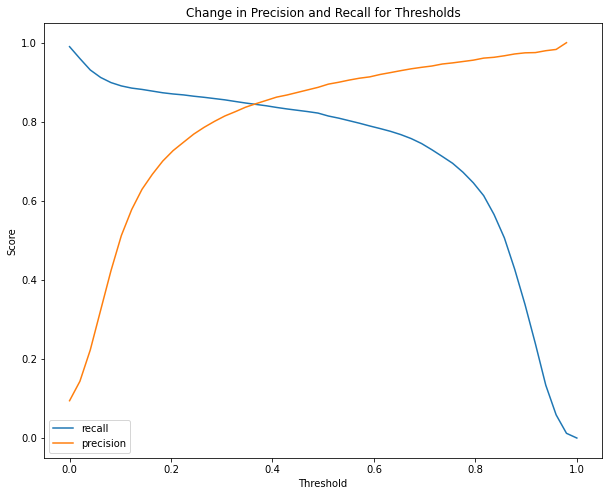

In [40]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(threshold, recall, label='recall')
ax.plot(threshold, precision, label='precision')
# ax.vlines([.08, .85], 0,1, linestyles='--', colors='green')
ax.legend()
ax.set_xlabel('Threshold')
ax.set_ylabel('Score')
ax.set_title('Change in Precision and Recall for Thresholds')
plt.show()

In [41]:
y_prob = rf_model.predict_proba(X_test)[:,1]

In [42]:
# make predictions based on probabilities and threshold
def predict(model, X, threshold=0.5):
    '''Return prediction of the fitted binary-classifier model model on X using
    the specifed `threshold`. NB: class 1 is the positive class'''
    return np.where(model.predict_proba(X)[:,1] > threshold, 1, 0)

# create confusion matrix with a given model and Xtest
def confusion_matrix(model, X, y,  threshold=0.5):
    cf = pd.crosstab(y, predict(model, X, threshold), dropna=False)
    cf = cf.add(pd.DataFrame([[0,0],[0,0]], columns=[0, 1], index=[0, 1]), fill_value=0)
    cf.index.name = 'actual'
    cf.columns.name = 'predicted'
    return cf

# calculate the payout for a given probability threshold
def calculate_payout(cb_matrix, model, X, y, threshold):
    return (confusion_matrix(model, X, y, threshold) * cb_matrix).values.sum()

In [43]:
rf_model.classes_

array([0, 1])

In [44]:
cf = confusion_matrix(rf_model, X_test, y_test)

In [45]:
cf

predicted,0,1
actual,,
0,75334,667
1,1261,5607


In [46]:
cb_matrix = pd.DataFrame([[0, -20], [0, 10]], columns=[0, 1], index=[0,1])
cb_matrix.index.name = 'actual'
cb_matrix.columns.name = 'predicted'

In [47]:
cb_matrix

predicted,0,1
actual,,
0,0,-20
1,0,10


In [48]:
calculate_payout(cb_matrix, rf_model, X_test, y_test, .5)

42730

In [49]:
-10*6414 + 26550 * 10

201360

In [50]:
# Cost benefit
def get_profits(model, X, y):
    cb_matrix = pd.DataFrame([[0, -20], [0, 10]], columns=[0, 1], index=[0,1])
    cb_matrix.index.name = 'actual'
    cb_matrix.columns.name = 'predicted'
    # calculate the payout with a the cost benefit matrix, 
    # given threshhold, model, and X
    thresholds = np.arange(0.0, 1.0, 0.05)
    profits = []
    for threshold in thresholds:
        profits.append(calculate_payout(cb_matrix, model, X, y, threshold))
    return profits
    
    
def profit_curve(profits, ax):
    thresholds = np.arange(0.0, 1.0, 0.05)
    ax.plot(thresholds, profits)
    ax.set_xlabel('Thresholds')
    ax.set_ylabel('Profits')
    ax.set_title('Profit Curve')
    print(profits)

In [51]:
profits = get_profits(rf_model, X_test, y_test)

(-250000.0, 200000.0)

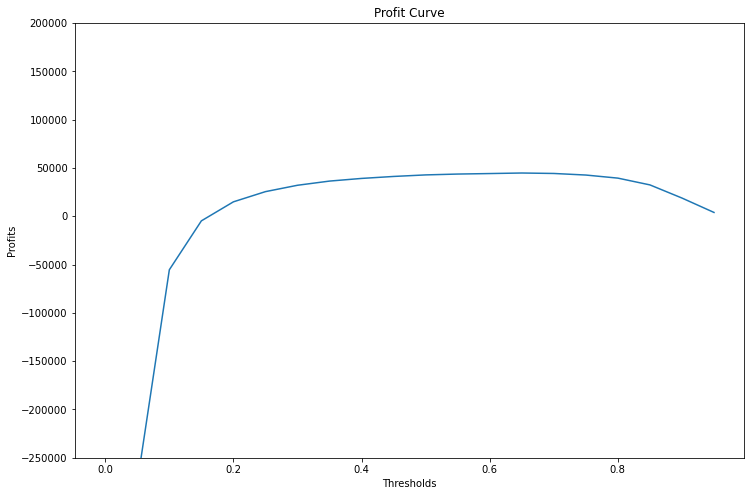

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))
thresholds = np.arange(0.0, 1.0, 0.05)
ax.plot(thresholds, profits)
ax.set_xlabel('Thresholds')
ax.set_ylabel('Profits')
ax.set_title('Profit Curve')
ax.set_ylim(-250000, 200000)

In [53]:
def get_yhat(probs, threshold):
    return probs > threshold

In [54]:
def get_cf_arrays(y_true, y_hat):
    true_positive = (y_true == 1) & (y_hat==1)
    true_negative = (y_true == 0) & (y_hat==0)
    false_positive = (y_true == 0) & (y_hat==1)
    false_negative = (y_true == 1) & (y_hat==0)
    return true_positive, true_negative, false_positive, false_negative

In [55]:
tp, tn, fp, fn = get_cf_arrays(y_test, get_yhat(probabilities[:,1], .65))

In [56]:
tp.sum() + tn.sum() + fp.sum() + fn.sum()

82869

In [57]:
y_test.shape[0]

82869

In [58]:
data.loc[y_test.index[tp]]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified
5520,145455851,NaN,8000,8000,8000.0,36,6.46,245.05,A,Meat Cutter,...,0,0,0,0,0,0,0,0,0,0
18076,145038052,NaN,30000,30000,30000.0,36,18.94,1098.78,D,General Manager,...,0,0,0,0,0,0,0,0,1,0
19348,145011883,NaN,14700,14700,14700.0,60,27.27,451.25,E,Teacher,...,0,0,0,1,0,0,0,0,0,0
24744,144852610,NaN,8000,8000,8000.0,36,8.19,251.40,A,Sub metro repair worker,...,0,0,0,0,0,0,0,0,0,0
25032,144766517,NaN,30000,30000,30000.0,36,15.02,1040.26,C,DRIVER,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418797,119975458,NaN,33000,33000,33000.0,36,25.82,1326.43,E,Horse Groomer,...,1,0,0,0,0,0,0,0,0,1
2418820,119417176,NaN,15425,15425,15425.0,60,19.03,400.39,D,Rolloff Driver,...,0,0,0,0,0,0,0,0,0,1
2418942,120086143,NaN,22250,22250,22250.0,60,18.06,565.74,D,Sr Military Admissions Consultant,...,0,0,0,0,0,0,0,0,0,1
2419797,120057235,NaN,35000,35000,35000.0,36,11.99,1162.34,B,Teacher / Investment Advisor,...,0,0,0,0,0,0,0,0,1,0


In [59]:
payment = [
    'loan_amnt', 
    'funded_amnt',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee']

In [60]:
data.loc[y_test.index[tp]][payment]

,loan_amnt,funded_amnt,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee
5520,8000,8000,0.0,0.0,0.00,0.00,0.00,0.00,0.0
18076,30000,30000,0.0,0.0,0.00,0.00,0.00,0.00,0.0
19348,14700,14700,0.0,0.0,857.96,857.96,237.05,620.91,0.0
24744,8000,8000,0.0,0.0,247.76,247.76,196.80,50.96,0.0
25032,30000,30000,0.0,0.0,1015.23,1015.23,664.76,350.47,0.0
...,...,...,...,...,...,...,...,...,...
2418797,33000,33000,0.0,0.0,0.00,0.00,0.00,0.00,0.0
2418820,15425,15425,0.0,0.0,0.00,0.00,0.00,0.00,0.0
2418942,22250,22250,0.0,0.0,2207.15,2207.15,944.57,1262.58,0.0
2419797,35000,35000,0.0,0.0,0.00,0.00,0.00,0.00,0.0


In [61]:
data[data.loan_amnt != data.funded_amnt][payment]

,loan_amnt,funded_amnt,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee
178659,5000,3400,0.00,0.00,3643.290000,3643.29,3400.00,243.29,0.0
179511,2875,2850,0.00,0.00,3181.145363,3181.15,2850.00,331.15,0.0
216117,33425,33325,9488.48,9474.25,42131.039690,42067.83,23836.52,18294.52,0.0
220369,32000,31900,0.00,0.00,33855.959850,33829.43,31900.00,1955.96,0.0
221038,25000,24975,0.00,0.00,26453.004910,26453.00,24975.00,1478.00,0.0
...,...,...,...,...,...,...,...,...,...
316583,35000,22550,0.00,0.00,22724.800000,22724.80,14480.92,8232.35,0.0
316586,20000,12675,0.00,0.00,17801.931680,17801.93,12675.00,5126.93,0.0
316592,12000,7775,0.00,0.00,11163.948260,11163.95,7775.00,3388.95,0.0
2452445,18000,10000,6601.71,6601.71,4485.580000,4485.58,3398.29,1087.29,0.0


In [62]:
data.loc[:,payment].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643639 entries, 0 to 2854471
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   loan_amnt           int64  
 1   funded_amnt         int64  
 2   out_prncp           float64
 3   out_prncp_inv       float64
 4   total_pymnt         float64
 5   total_pymnt_inv     float64
 6   total_rec_prncp     float64
 7   total_rec_int       float64
 8   total_rec_late_fee  float64
dtypes: float64(7), int64(2)
memory usage: 266.2 MB


In [63]:
(data.loc[y_test.index[tp]]['funded_amnt'].sum()-data.loc[y_test.index[tp]]['total_rec_prncp'].sum())/y_test.index[tp].shape[0]

14483.39396319484

In [64]:
data.loc[y_test.index[fp]]['total_rec_int'].sum()

294807.62

In [65]:
def potential_principal_saved(tp, fp, interest=False):
    # Principal remaining
    funded = data.loc[y_test.index[tp]]['funded_amnt'].sum()
    princ_rec = data.loc[y_test.index[tp]]['total_rec_prncp'].sum()
    int_rec = data.loc[y_test.index[tp]]['total_rec_int'].sum()
    missed_int = data.loc[y_test.index[fp]]['total_rec_int'].sum()
    recovered = data.loc[y_test.index[tp]]['recoveries'].sum()
    saved = funded - princ_rec - missed_int - int_rec - recovered
    if interest:
        saved -= int_rec
    return saved
    

In [66]:
savings = []
for t in threshold:
    tp, tn, fp, fn = get_cf_arrays(y_test, get_yhat(probabilities[:,1], t))
    savings.append(potential_principal_saved(tp, fp))

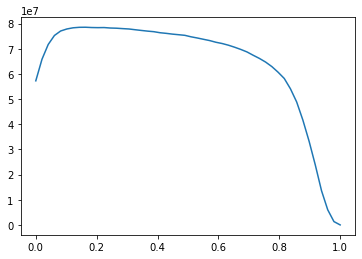

In [67]:
fig, ax = plt.subplots()

ax.plot(threshold, savings)

In [68]:
savings = []
for t in threshold:
    tp, tn, fp, fn = get_cf_arrays(y_test, get_yhat(probabilities[:,1], t))
    savings.append(potential_principal_saved(tp, fp, True))


Text(0, 0.5, 'Dollars Saved')

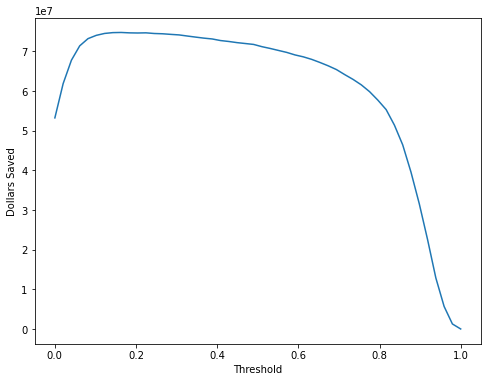

In [69]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(threshold, savings)
ax.set_xlabel('Threshold')
ax.set_ylabel('Dollars Saved')

In [70]:
threshold[np.argmax(savings)]

0.16326530612244897

In [71]:
tp, tn, fp, fn = get_cf_arrays(y_test, get_yhat(probabilities[:,1], .8))

In [72]:
funded = data.loc[y_test.index[tp]]['funded_amnt'].sum()
princ_rec = data.loc[y_test.index[tp]]['total_rec_prncp'].sum()
int_rec = data.loc[y_test.index[tp]]['total_rec_int'].sum()
missed_int = data.loc[y_test.index[fp]]['total_rec_int'].sum()
recovered = data.loc[y_test.index[tp]]['recoveries'].sum()
saved = funded - princ_rec - missed_int - int_rec - recovered
saved

59401792.78999999

In [73]:
current_loan_prob = rf_model.predict_proba(X_val)

In [74]:
def interest_calculator(funded, interest, payment):
    current_balance = funded
    r = interest/100
    interest_paid = 0
    while current_balance > 0:
        accrued = (current_balance * r)/12
        interest_paid += accrued
        current_balance -= (payment - accrued)
        if interest_paid > funded:
            return 0
    return round(interest_paid,2)
    

In [77]:
validation['potential_interest'] = validation.apply(lambda row: interest_calculator(row['funded_amnt'], row['int_rate'], row['installment']), axis=1)

<ipython-input-77-39f67147d747>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['potential_interest'] = validation.apply(lambda row: interest_calculator(row['funded_amnt'], row['int_rate'], row['installment']), axis=1)


In [76]:
interest_calculator(data.loc[0, 'funded_amnt'], data.loc[0, 'int_rate'], data.loc[0, 'installment'])

1672.0

In [78]:
validation['potential_interest']

0           1672.00
1            556.71
2           4589.33
4           8361.80
5           3850.20
             ...   
2420059    29067.86
2420060     4782.94
2420062     1955.40
2420063    10565.62
2420064     7660.90
Name: potential_interest, Length: 1376521, dtype: float64

In [85]:
validation.loc[y_val.index[current_loan_prob[:,1] > .5]]['potential_interest'].sum()

127019778.61

In [87]:

potential_interest = []
for t in threshold:
    potential_interest.append(validation.loc[y_val.index[current_loan_prob[:,1] > t]]['potential_interest'].sum())

Text(0, 0.5, 'Dollars Saved')

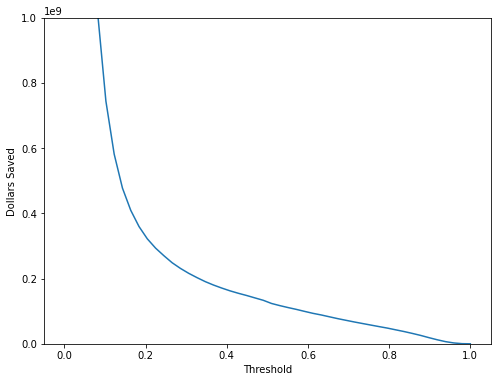

In [101]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(threshold, np.array(potential_interest))
ax.set_ylim(0,1000000000)
ax.set_xlabel('Threshold')
ax.set_ylabel('Dollars Saved')

In [89]:
net = np.array(savings)-np.array(potential_interest)

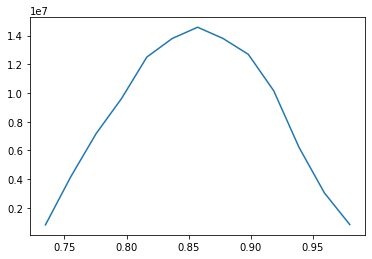

In [106]:
fig, ax = plt.subplots()

ax.plot(threshold[net>0],net[net > 0])

In [103]:
threshold[net > 0]

array([0.73469388, 0.75510204, 0.7755102 , 0.79591837, 0.81632653,
       0.83673469, 0.85714286, 0.87755102, 0.89795918, 0.91836735,
       0.93877551, 0.95918367, 0.97959184])